# Lab | Cleaning numerical data

#### Lab | Cleaning categorical data below!!

For this lab, we will be using the dataset in the Customer Analysis Business Case. This dataset can be found in files_for_lab folder.
Context

An auto insurance company has collected some data about its customers including their demographics, education, employment, policy details, vehicle information on which insurance policy is, and claim amounts. You will help the senior management with some business questions that will help them to better understand their customers, improve their services, and improve profitability.

Some business Objectives:

    Retain customers,
    Analyze relevant customer data,
    Develop focused customer retention programs.

Based on the analysis, take targeted actions to increase profitable customer response, retention, and growth.

##### 1. Import the necessary libraries.

In [1]:
# Base libraries
import pandas as pd
import numpy as np

pd.set_option('display.max_columns', None)

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import BASE_COLORS

%matplotlib inline

#warnings
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings("ignore", message="numpy.ufunc size changed")

##### 2. Load the `we_fn_use_c_marketing_customer_value_analysis.csv` into the variable `customer_df`.

In [2]:
customer_df = pd.read_csv("data/we_fn_use_c_marketing_customer_value_analysis.csv")

##### 3. First look at its main features (head, shape, info).

In [3]:
customer_df.head(5)

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [4]:
customer_df.shape

(9134, 24)

In [5]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

##### 4. Rename the columns so they follow the PE8 (snake case) 
https://www.python.org/dev/peps/pep-0008/ \
PE8 -- Style Guide for Python Code 

In [6]:
#change column names
new_cols = [col.replace(" ", "_").lower() for col in customer_df]
customer_df.columns = new_cols

##### 5. Change effective to date column to datetime format.

In [7]:
# date column to datetime format
customer_df['effective_to_date'] = pd.to_datetime(customer_df['effective_to_date'])

##### 6. Check NaN values per column.

In [8]:
#Check NaNs Total
customer_df.isna().sum()

customer                         0
state                            0
customer_lifetime_value          0
response                         0
coverage                         0
education                        0
effective_to_date                0
employmentstatus                 0
gender                           0
income                           0
location_code                    0
marital_status                   0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
policy_type                      0
policy                           0
renew_offer_type                 0
sales_channel                    0
total_claim_amount               0
vehicle_class                    0
vehicle_size                     0
dtype: int64

In [9]:
# Check NaNs (Percentage)
customer_df.isna().sum()/len(customer_df)

customer                         0.0
state                            0.0
customer_lifetime_value          0.0
response                         0.0
coverage                         0.0
education                        0.0
effective_to_date                0.0
employmentstatus                 0.0
gender                           0.0
income                           0.0
location_code                    0.0
marital_status                   0.0
monthly_premium_auto             0.0
months_since_last_claim          0.0
months_since_policy_inception    0.0
number_of_open_complaints        0.0
number_of_policies               0.0
policy_type                      0.0
policy                           0.0
renew_offer_type                 0.0
sales_channel                    0.0
total_claim_amount               0.0
vehicle_class                    0.0
vehicle_size                     0.0
dtype: float64

No NaNs? Check data

In [10]:
customer_df.describe()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,8004.940475,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794
std,6870.967608,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,3994.251794,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244
50%,5780.182197,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434
75%,8962.167041,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


In [11]:
# Income variable first quartil == min. Too many zeros. 
customer_df['income'].value_counts()
#Length: n. of unique values

0        2317
95697      12
40864       7
24910       7
25965       7
         ... 
26952       1
84300       1
22862       1
20815       1
57240       1
Name: income, Length: 5694, dtype: int64

In [12]:
#replace zeros with median
median_income=customer_df['income'].median(skipna=True)
customer_df['income']=customer_df.income.mask(customer_df.income==0,median_income)

In [13]:
customer_df['income'].value_counts()

33889.5    2317
95697.0      12
20978.0       7
40864.0       7
61108.0       7
           ... 
18779.0       1
61085.0       1
25074.0       1
49057.0       1
18944.0       1
Name: income, Length: 5694, dtype: int64

##### 7. Store continuous data into a continuous variable and do the same for discrete and categorical. For the categorical data, check if there is some kind of text in a variable so we would need to clean it. Hint: Use the same method you used in step 7. Depending on the implementation, decide what to do with the variables you get.

Check discrete and continuous variables

Only numerical variables can be discrete or continuous

In [14]:
numericals = customer_df.select_dtypes(np.number)
numericals.head()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,2763.519279,56274.0,69,32,5,0,1,384.811147
1,6979.535903,33889.5,94,13,42,0,8,1131.464935
2,12887.431650,48767.0,108,18,38,0,2,566.472247
3,7645.861827,33889.5,106,18,65,0,7,529.881344
4,2813.692575,43836.0,73,12,44,0,1,138.130879


In [15]:
#the discrete variables will be likely the ones with less unique values
numericals.nunique()

customer_lifetime_value          8041
income                           5694
monthly_premium_auto              202
months_since_last_claim            36
months_since_policy_inception     100
number_of_open_complaints           6
number_of_policies                  9
total_claim_amount               5106
dtype: int64

In [16]:
discrete = [i for i in numericals if (len(numericals[i].unique()) < (numericals.shape[0] * 0.01))]

In [17]:
discrete

['months_since_last_claim', 'number_of_open_complaints', 'number_of_policies']

In [18]:
continuous = list(numericals.drop(columns = discrete).columns)

In [19]:
continuous

['customer_lifetime_value',
 'income',
 'monthly_premium_auto',
 'months_since_policy_inception',
 'total_claim_amount']

In [20]:
customer_df.head()

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,location_code,marital_status,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2011-02-24,Employed,F,56274.0,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,2011-01-31,Unemployed,F,33889.5,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2011-02-19,Employed,F,48767.0,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,2011-01-20,Unemployed,M,33889.5,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2011-02-03,Employed,M,43836.0,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


##### 8. For the categorical data, check if there is some kind of text in a variable so we would need to clean it. Hint: Use the same method you used in step 7. Depending on the implementation, decide what to do with the variables you get.

The categorical values that are not the IDs

In [21]:
categorical = customer_df.select_dtypes(object)

In [22]:
categorical.nunique()

customer            9134
state                  5
response               2
coverage               3
education              5
employmentstatus       5
gender                 2
location_code          3
marital_status         3
policy_type            3
policy                 9
renew_offer_type       4
sales_channel          4
vehicle_class          6
vehicle_size           3
dtype: int64

In [23]:
categorical_columns = [i for i in categorical if (len(categorical[i].unique()) < (numericals.shape[0] * 0.01))]

In [24]:
#no customer_id anymore
categorical_columns

['state',
 'response',
 'coverage',
 'education',
 'employmentstatus',
 'gender',
 'location_code',
 'marital_status',
 'policy_type',
 'policy',
 'renew_offer_type',
 'sales_channel',
 'vehicle_class',
 'vehicle_size']

In [25]:
categorical_df=customer_df[categorical_columns]

##### 9. Get categorical features.

In [26]:
categorical_df

,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,California,No,Basic,Bachelor,Employed,M,Urban,Married,Personal Auto,Personal L1,Offer2,Web,Four-Door Car,Medsize
9130,California,Yes,Extended,College,Employed,F,Suburban,Divorced,Corporate Auto,Corporate L3,Offer1,Branch,Four-Door Car,Medsize
9131,California,No,Extended,Bachelor,Unemployed,M,Suburban,Single,Corporate Auto,Corporate L2,Offer1,Branch,Four-Door Car,Medsize
9132,California,No,Extended,College,Employed,M,Suburban,Married,Personal Auto,Personal L2,Offer3,Branch,Four-Door Car,Large


## Lab | Cleaning categorical data

##### 1. Load the continuous and discrete variables into continuous_df and discrete_df variables.

In [27]:
continuous_df = numericals.drop(columns = discrete)

In [28]:
continuous_df.head()

,customer_lifetime_value,income,monthly_premium_auto,months_since_policy_inception,total_claim_amount
0,2763.519279,56274.0,69,5,384.811147
1,6979.535903,33889.5,94,42,1131.464935
2,12887.431650,48767.0,108,38,566.472247
3,7645.861827,33889.5,106,65,529.881344
4,2813.692575,43836.0,73,44,138.130879


In [29]:
discrete_df = numericals[discrete]

In [30]:
discrete_df

,months_since_last_claim,number_of_open_complaints,number_of_policies
0,32,0,1
1,13,0,8
2,18,0,2
3,18,0,7
4,12,0,1
...,...,...,...
9129,18,0,2
9130,14,0,1
9131,9,3,2
9132,34,0,3


##### 2. Plot a correlation matrix, what can you see?

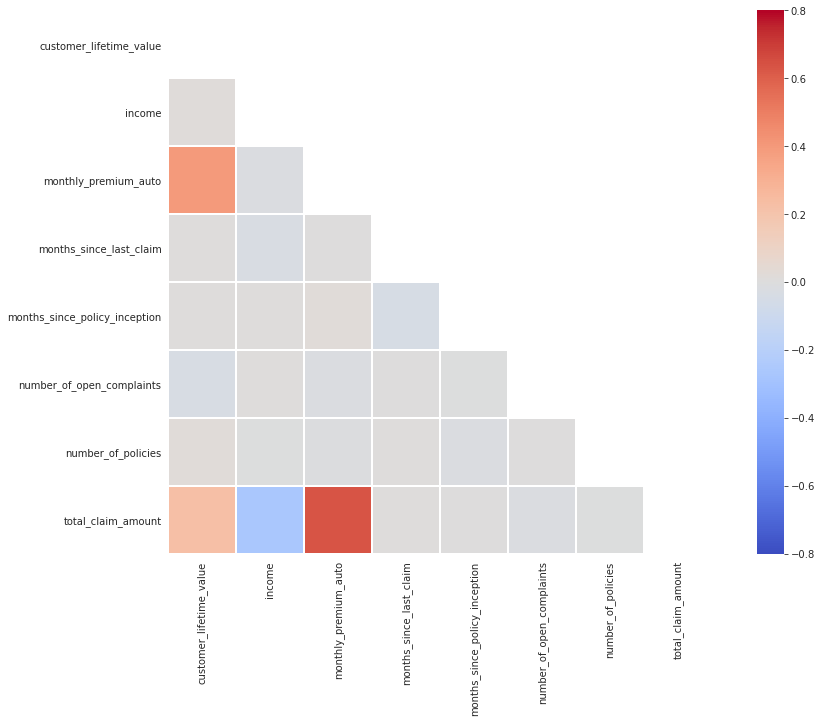

In [31]:
mask = np.zeros_like(numericals.corr())
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(16, 10))
    ax = sns.heatmap(numericals.corr(), mask=mask,
                     square=True, linewidths=1, cmap="coolwarm",
                     vmax = 0.8, vmin = -0.8)

### Discrete

##### 3. Create a function to plot every discrete variables. Do the same with continuous variables (be careful, you may change the plot type to another one better suited for continuous data).

In [32]:
# Create function to print barplots from discrete data

def df_bar(df):
    sns.set(rc={'figure.figsize':(16,8)})
    for i, col in enumerate(df):
        plt.figure(i)
        sns.barplot(x = df[col].value_counts().index, y = df[col].value_counts())
        
    plt.show()

#The enumerate() method adds counter to an iterable and returns it (the enumerate object).

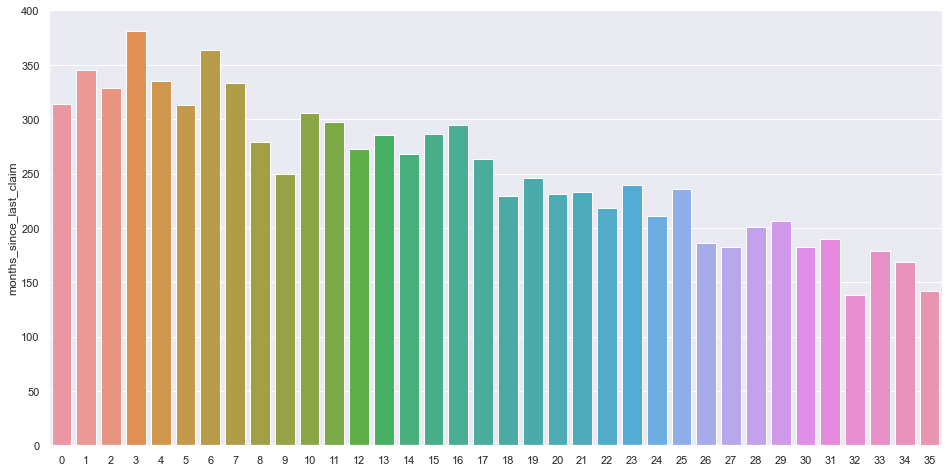

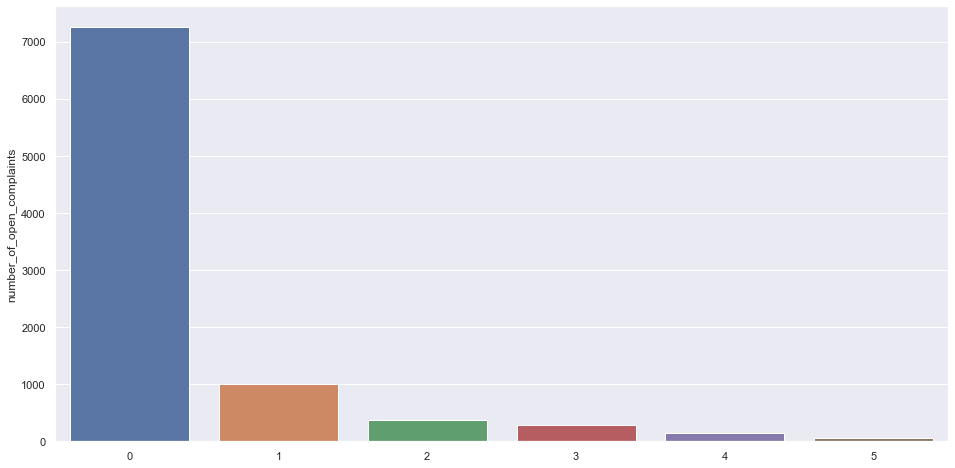

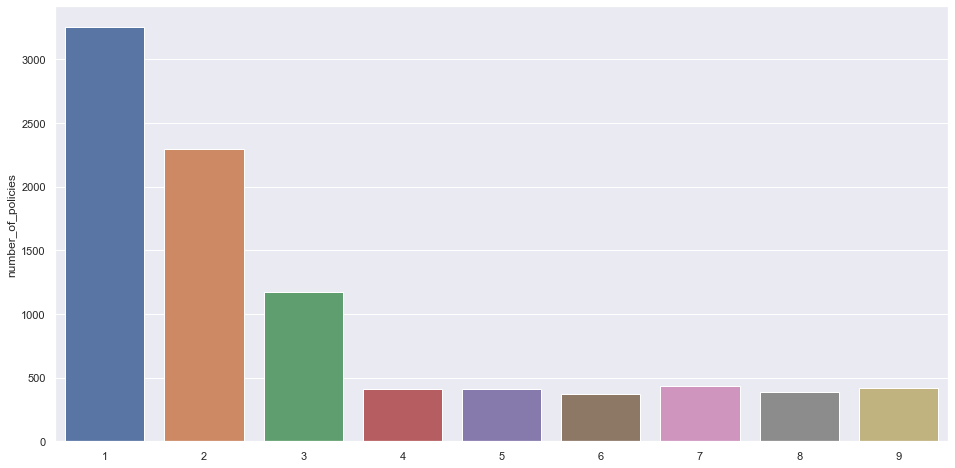

In [33]:
df_bar(discrete_df)

### Continuous

In [34]:
def df_hist(df):
    sns.set(rc={'figure.figsize':(16,8)})
    for i, col in enumerate(df):
        plt.figure(i)
        sns.distplot(df[col], color = list(BASE_COLORS.keys())[i])
        
    plt.show()

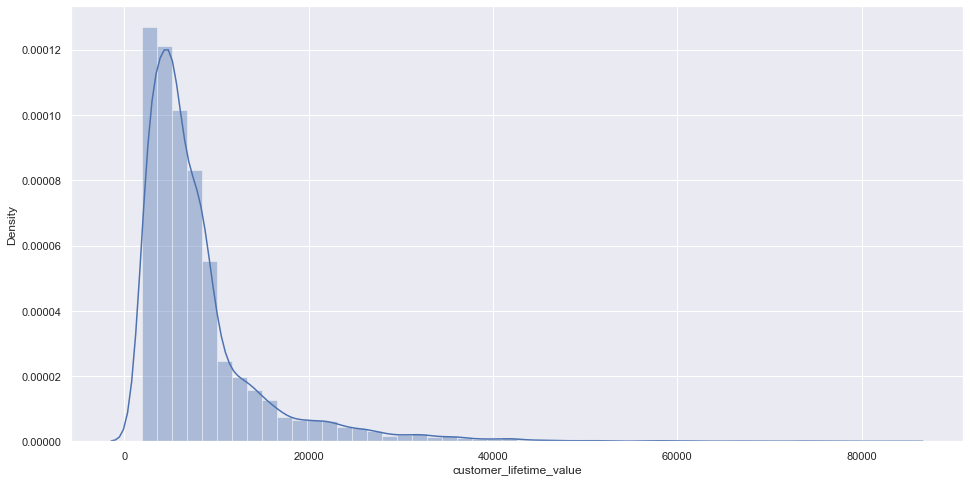

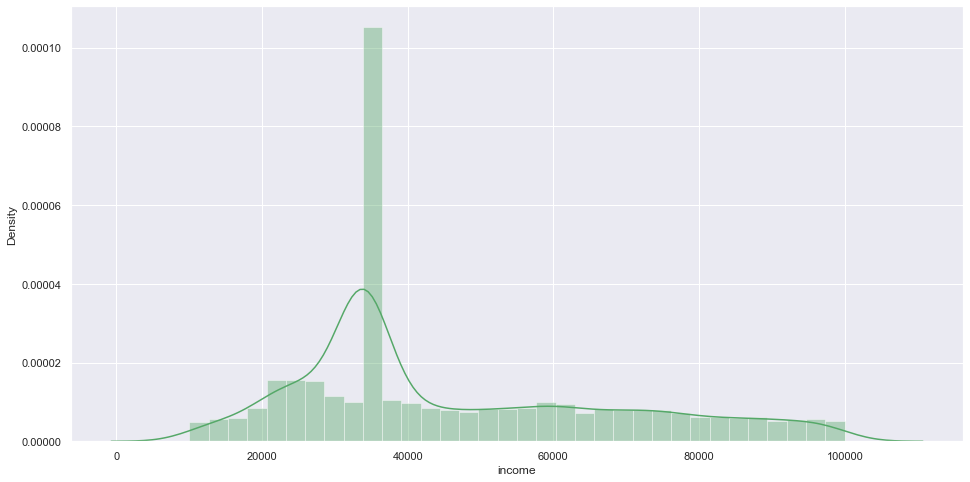

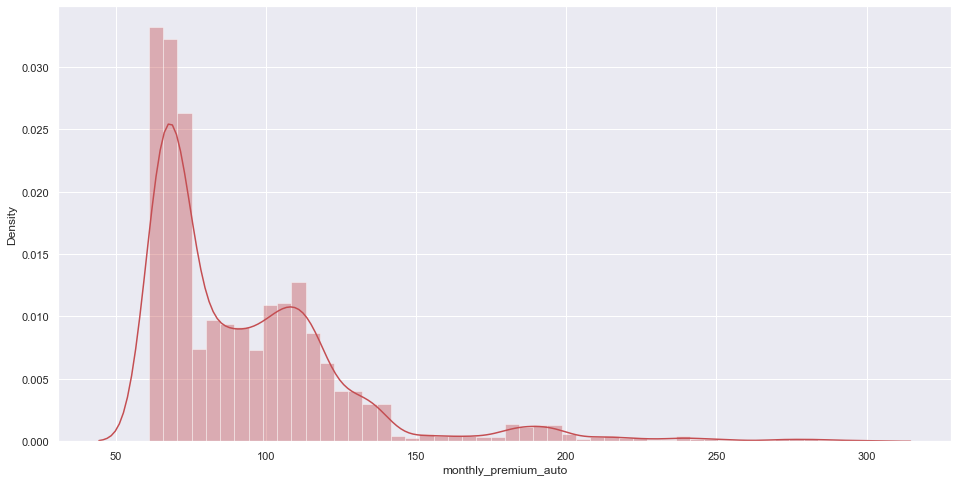

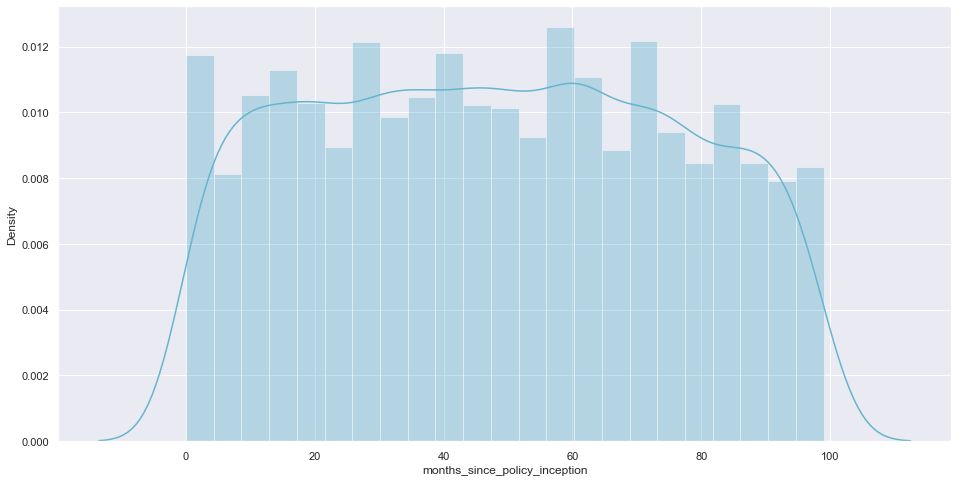

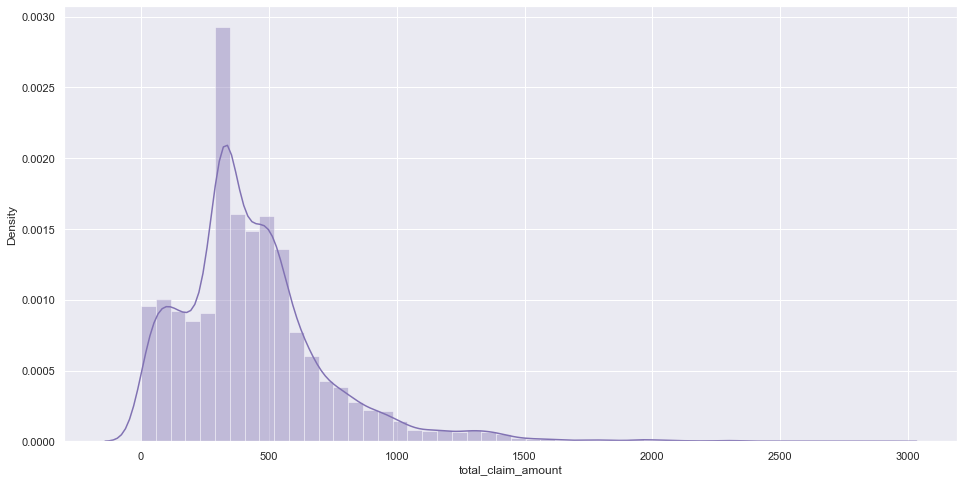

In [35]:
df_hist(continuous_df)

###### 5. Only total claim amount (target), income and customer lifetime look like continous variables. better check more in depth what's happening there:

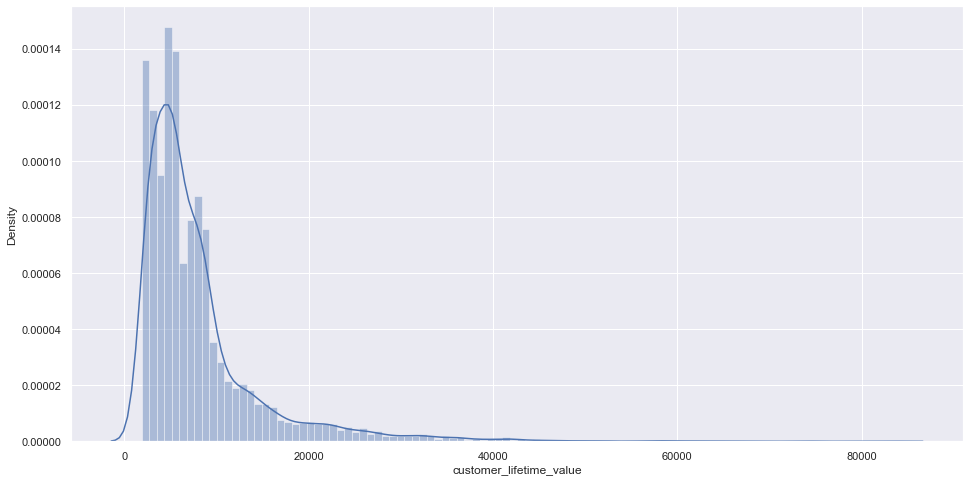

In [36]:
sns.distplot(continuous_df["customer_lifetime_value"], bins = 100);

In [37]:
continuous_df["customer_lifetime_value"].value_counts()

2300.691547     6
6057.072080     6
6005.214792     6
8819.018934     6
4984.618655     6
               ..
12206.892080    1
3728.830130     1
2456.816647     1
2675.029491     1
4491.909095     1
Name: customer_lifetime_value, Length: 8041, dtype: int64

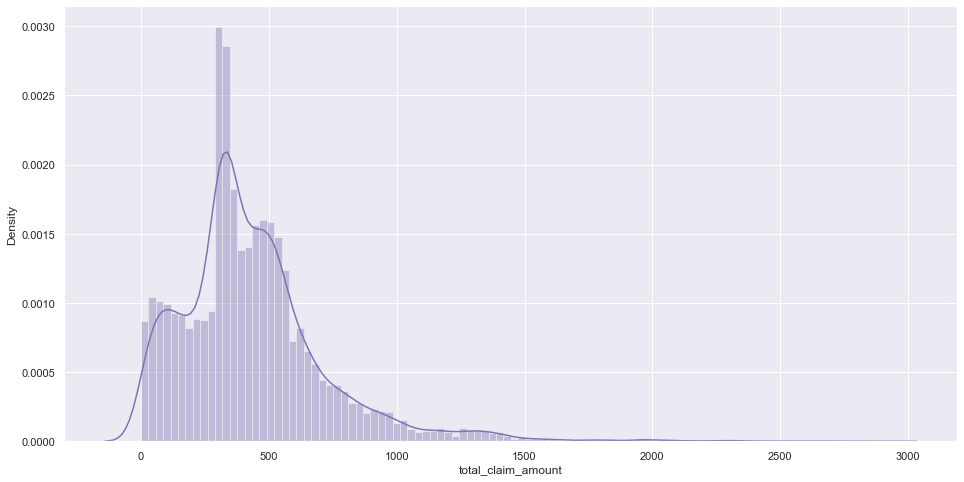

In [38]:
sns.distplot(continuous_df["total_claim_amount"], bins = 100, color = list(BASE_COLORS.keys())[4]);

In [39]:
continuous_df["total_claim_amount"].value_counts()

316.800000    116
292.800000    110
312.000000    108
350.400000    105
331.200000    102
             ... 
212.009825      1
314.880326      1
707.925645      1
246.993145      1
204.620759      1
Name: total_claim_amount, Length: 5106, dtype: int64

Distribution looks fine, probably no nans were replaced.

##### 6. Look for outliers in the continuous variables we have found. Hint: There is a good plot to do that.

In [40]:
continuous[:3]

['customer_lifetime_value', 'income', 'monthly_premium_auto']

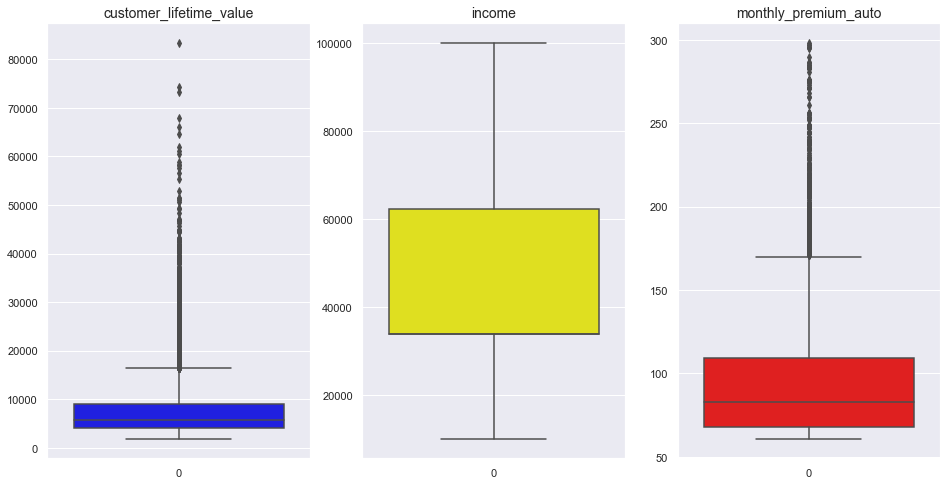

In [41]:
box_colors = ["blue", "yellow", "red"]

f, ax = plt.subplots(1, 3, figsize=(16,8))


for i, col in enumerate(continuous[:3]):
    sns.boxplot(data = continuous_df[col], ax = ax[i], color = box_colors[i])
    ax[i].set_title(col, fontsize = 14)
plt.show();

Many outliers in customer lifetime vaulue and monthly_premium_auto